In [22]:
# Importing libraries
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Setting directory and loading data 
os.chdir("C:/Users/48512/Desktop/Climate Studies/Period 5 and 6/Design of climate change mitigation and adaptation strategies/Data/dataimd")


In [26]:
# Importing Tmax data
tmax_chik = pd.read_csv("tmax_13.25_77.44.csv", delimiter=",")
tmax_raich = pd.read_csv("tmax_16.50_76.75.csv", delimiter=",")

In [28]:
# Importing Tmin data
tmin_chik = pd.read_csv("tmin_13.25_77.44.csv", delimiter=",")
tmin_raich = pd.read_csv("tmin_16.50_76.75.csv", delimiter=",")

In [30]:
# Adding datetime as an index for every df

###########################################
tmax_chik["date_time"] = pd.to_datetime(tmax_chik["DateTime"])
# Set date_time as the index
tmax_chik.set_index("date_time", inplace=True)
# Renaming the column with precipitation
tmax_chik.rename(columns={'13.25 77.44': 'Temperature'}, inplace=True)

###########################################
tmin_raich["date_time"] = pd.to_datetime(tmin_raich["DateTime"])
# Set date_time as the index
tmin_raich.set_index("date_time", inplace=True)
# Renaming the column with precipitation
tmin_raich.rename(columns={'16.5 76.75': 'Temperature'}, inplace=True)

###########################################
tmin_chik["date_time"] = pd.to_datetime(tmin_chik["DateTime"])
# Set date_time as the index
tmin_chik.set_index("date_time", inplace=True)
# Renaming the column with precipitation
tmin_chik.rename(columns={'13.25 77.44': 'Temperature'}, inplace=True)

###########################################
tmax_raich["date_time"] = pd.to_datetime(tmax_raich["DateTime"])
# Set date_time as the index
tmax_raich.set_index("date_time", inplace=True)
# Renaming the column with precipitation
tmax_raich.rename(columns={'16.5 76.75': 'Temperature'}, inplace=True)

###########################################

In [32]:
# deleting the additional DateTime column (running this cell makes it impossible to run previous cells- they ale use the deleted 'DateTime')
del tmax_chik['DateTime']
del tmax_raich['DateTime']
del tmin_chik['DateTime']
del tmin_raich['DateTime']

In [34]:
# Resampling Tmax data for mean weekly, monthly and yearly data

###########################################
tmax_raich_monthly_mean = tmax_raich.resample("ME").mean()
tmax_raich_weekly_mean = tmax_raich.resample("W").mean()
tmax_raich_yearly_mean = tmax_raich.resample("YE").mean()

###########################################
tmax_chik_monthly_mean = tmax_chik.resample("ME").mean()
tmax_chik_weekly_mean = tmax_chik.resample("W").mean()
tmax_chik_yearly_mean = tmax_chik.resample("YE").mean()

###########################################

In [36]:
# Resampling Tmax data for maximum weekly, monthly and yearly data

###########################################
tmax_raich_monthly_max = tmax_raich.resample("ME").max()
tmax_raich_weekly_max = tmax_raich.resample("W").max()
tmax_raich_yearly_max = tmax_raich.resample("YE").max()

###########################################
tmax_chik_monthly_max  = tmax_chik.resample("ME").max()
tmax_chik_weekly_max = tmax_chik.resample("W").max()
tmax_chik_yearly_max = tmax_chik.resample("YE").max()

###########################################

In [38]:
# Resampling Tmin data for mean weekly, monthly and yearly data

###########################################
tmin_raich_monthly_mean = tmin_raich.resample("ME").mean()
tmin_raich_weekly_mean = tmin_raich.resample("W").mean()
tmin_raich_yearly_mean = tmin_raich.resample("YE").mean()

###########################################
tmin_chik_monthly_mean = tmin_chik.resample("ME").mean()
tmin_chik_weekly_mean = tmin_chik.resample("W").mean()
tmin_chik_yearly_mean = tmin_chik.resample("YE").mean()

###########################################

In [39]:
# Resampling Tmin data for minimum weekly, monthly and yearly data

###########################################
tmin_raich_monthly_min = tmin_raich.resample("ME").min()
tmin_raich_weekly_min = tmin_raich.resample("W").min()
tmin_raich_yearly_min = tmin_raich.resample("YE").min()

###########################################
tmin_chik_monthly_min = tmin_chik.resample("ME").min()
tmin_chik_weekly_min = tmin_chik.resample("W").min()
tmin_chik_yearly_min = tmin_chik.resample("YE").min()

###########################################

In [41]:
### General long-term trends ###

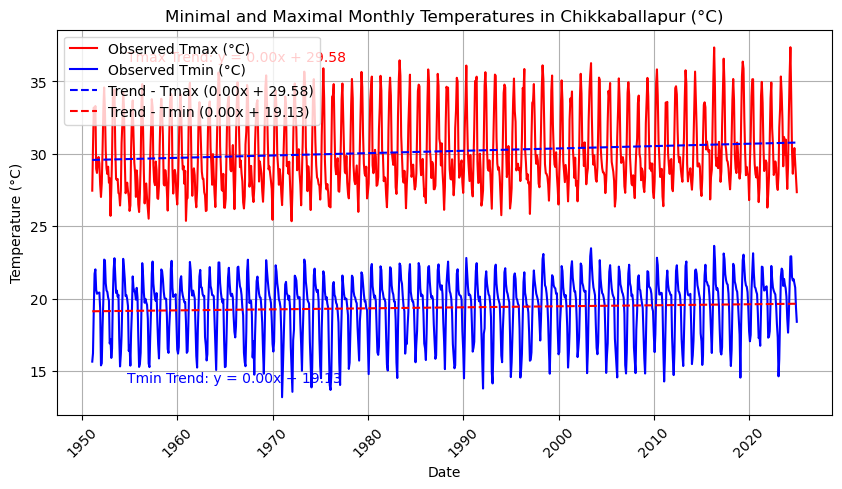

In [44]:
# Plotting of Tmin and Tmax

# Fit trend lines
tmax_monthly = tmax_chik_monthly_mean 
tmin_monthly = tmin_chik_monthly_mean

tmax_coeffs = np.polyfit(range(len(tmax_monthly)), tmax_monthly['Temperature'], 1)
tmin_coeffs = np.polyfit(range(len(tmin_monthly)), tmin_monthly['Temperature'], 1)

tmax_fit = np.poly1d(tmax_coeffs)
tmin_fit = np.poly1d(tmin_coeffs)

# Plot the observed temperatures
plt.figure(figsize=(10,5))

plt.plot(tmax_monthly.index, tmax_monthly['Temperature'], label='Observed Tmax (°C)', color='red')
plt.plot(tmin_monthly.index, tmin_monthly['Temperature'], label='Observed Tmin (°C)', color='blue')

# Plot the trend lines
plt.plot(tmax_monthly.index, tmax_fit(range(len(tmax_monthly))), linestyle='dashed', color='blue', label=f'Trend - Tmax ({tmax_coeffs[0]:.2f}x + {tmax_coeffs[1]:.2f})')
plt.plot(tmin_monthly.index, tmin_fit(range(len(tmin_monthly))), linestyle='dashed', color='red', label=f'Trend - Tmin ({tmin_coeffs[0]:.2f}x + {tmin_coeffs[1]:.2f})')

# Formatting the plot
plt.title("Minimal and Maximal Monthly Temperatures in Chikkaballapur (°C)")
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the equation on the plot
plt.text(tmax_monthly.index[int(len(tmax_monthly) * 0.05)], 
         max(tmax_monthly['Temperature']) - 1, 
         f"Tmax Trend: y = {tmax_coeffs[0]:.2f}x + {tmax_coeffs[1]:.2f}", 
         color="red", fontsize=10)

plt.text(tmin_monthly.index[int(len(tmin_monthly) * 0.05)], 
         min(tmin_monthly['Temperature']) + 1, 
         f"Tmin Trend: y = {tmin_coeffs[0]:.2f}x + {tmin_coeffs[1]:.2f}", 
         color="blue", fontsize=10)

plt.show()